### Import Package

In [63]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import Dataset

In [64]:
df = pd.read_csv('Train.csv')
df

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
0          1               D           Flight                    4   
1          2               F           Flight                    4   
2          3               A           Flight                    2   
3          4               B           Flight                    3   
4          5               C           Flight                    2   
...      ...             ...              ...                  ...   
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    2                  177                3   
1                    5                  216                2   
2                    2                  183                4   
3                    3                  176                4   
4                    2                  184                3   
...                ...                  ...              ...   
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
0                    low      F                44           1233   
1                    low      M                59           3088   
2                    low      M                48           3374   
3                 medium      M                10           1177   
4                 medium      F                46           2484   
...                  ...    ...               ...            ...   
10994             medium      F                 1           1538   
10995             medium      F                 6           1247   
10996                low      F                 4           1155   
10997             medium      M                 2           1210   
10998                low      F                 6           1639   

       Reached.on.Time_Y.N  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
10994                    1  
10995                    0  
10996                    0  
10997                    0  
10998                    0  

[10999 rows x 12 columns]

#### Lakukan data preprocessing terlebih dahulu agar model yang kita latih nanti akan berjalan dengan baik

#### - Standarisasi data dan Normalisasi Data

In [65]:
from sklearn.preprocessing import MinMaxScaler # untuk Normalisasi data
from sklearn.preprocessing import StandardScaler # untuk standarisasi data
import numpy as np 

mms = MinMaxScaler()
ss = StandardScaler()

normalisasiData = mms.fit_transform(df[['Reached.on.Time_Y.N']])
print(" Nilai scaling data : ", (normalisasiData))
standarisasiData = ss.fit_transform(df[['Cost_of_the_Product', 'Discount_offered']])
print(" Nilai standar deviasi : ", np.std(standarisasiData))

 Nilai scaling data :  [[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
 Nilai standar deviasi :  1.0


## A. Supervised Learning

### A1. Support Vector Classifier

In [66]:
X = df[['Cost_of_the_Product', 'Discount_offered']] # Data frame (2D)
y = df['Reached.on.Time_Y.N'] # Array / Series (1D)

# Mengubah data numerik menjadi data kategorikal
y = np.where (y == 1, 'onTime', 'Delay')

#### Data Split

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 30
)

#### Melatih Model 

In [68]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

#### Melakukan prediksi y terhadap X

In [69]:
y_pred = svm.predict(X_test)
sv = svm.support_vectors_

### A2. Evaluasi Klasifikasi

#### - Confussion Matrix

TypeError: 'str' object is not callable

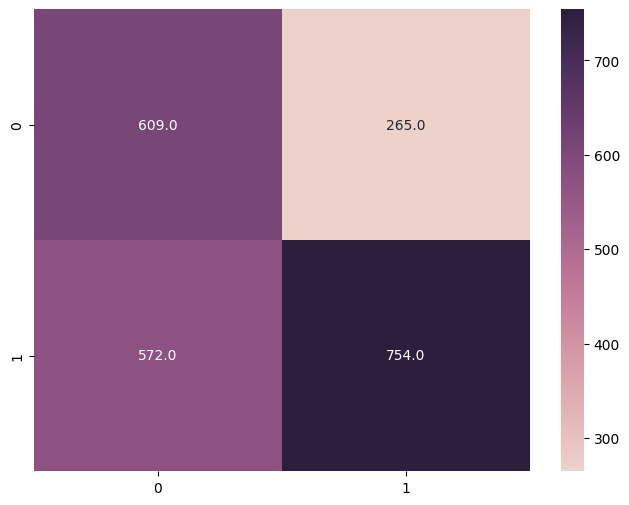

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.1f', cmap=sns.cubehelix_palette(as_cmap=True))
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Multiclass")
plt.show()

##### Dari Confussion Matrix di atas hasil klasifikasi yang diprediksi oleh model dengan hasil klasifikasi yang sebenernya dari data menunjukkan True Negative karena memiliki nilai 754 (paling tinggi), yang artinya prediksi model negatif dan benar.

#### - Classification Report

In [71]:
from sklearn.metrics import classification_report as cr
hasil = cr(y_test, y_pred)
print(hasil)

              precision    recall  f1-score   support

       Delay       0.52      0.70      0.59       874
      onTime       0.74      0.57      0.64      1326

    accuracy                           0.62      2200
   macro avg       0.63      0.63      0.62      2200
weighted avg       0.65      0.62      0.62      2200



##### - Precision : Sekitar 0.52 / 52% dari prediksi 'Delay' yang dibuat oleh model adalah benar. Dan untuk prediksi 'onTime' sekitar 74% prediksi yang dibuat oleh model adalah benar.

##### - Recall : Untuk 'Delay' recallnya adalah 0.70 yang artinya model dapat mengidentifikasi sekitar 70% dari semua instance 'Delay'. Untuk kelas 'onTime' model dapat mengidentifikasi sekitar 57% dari semua instance 'onTime'.

##### - F1-Score : F1-Score bertujuan untuk melihat keseimbangan antara Presicion dan Recall. Untuk kelas 'Delay' sebesar 0.59 dan untuk kelas 'onTime' sebesar 0.64.

##### - Support : Untuk kelas 'Delay' ada 874 data points, dan untuk kelas 'onTime' ada 1326 data points.

##### - Accuracy : Memiliki akurasi 0.62 yang artinya model dapat memprediksi dengan benar dari semua data points dalam data uji.

##### - Macro AVG : rata-rata yang dimiliki dari Precision, Recall, dan F1-Score adalah 0.62.
##### - Weighted AVG : Rata-rata dengan bobot berdasarkan jumlah data points dalam setiap kelas sebesar 0.62.

### A3

TypeError: 'str' object is not callable

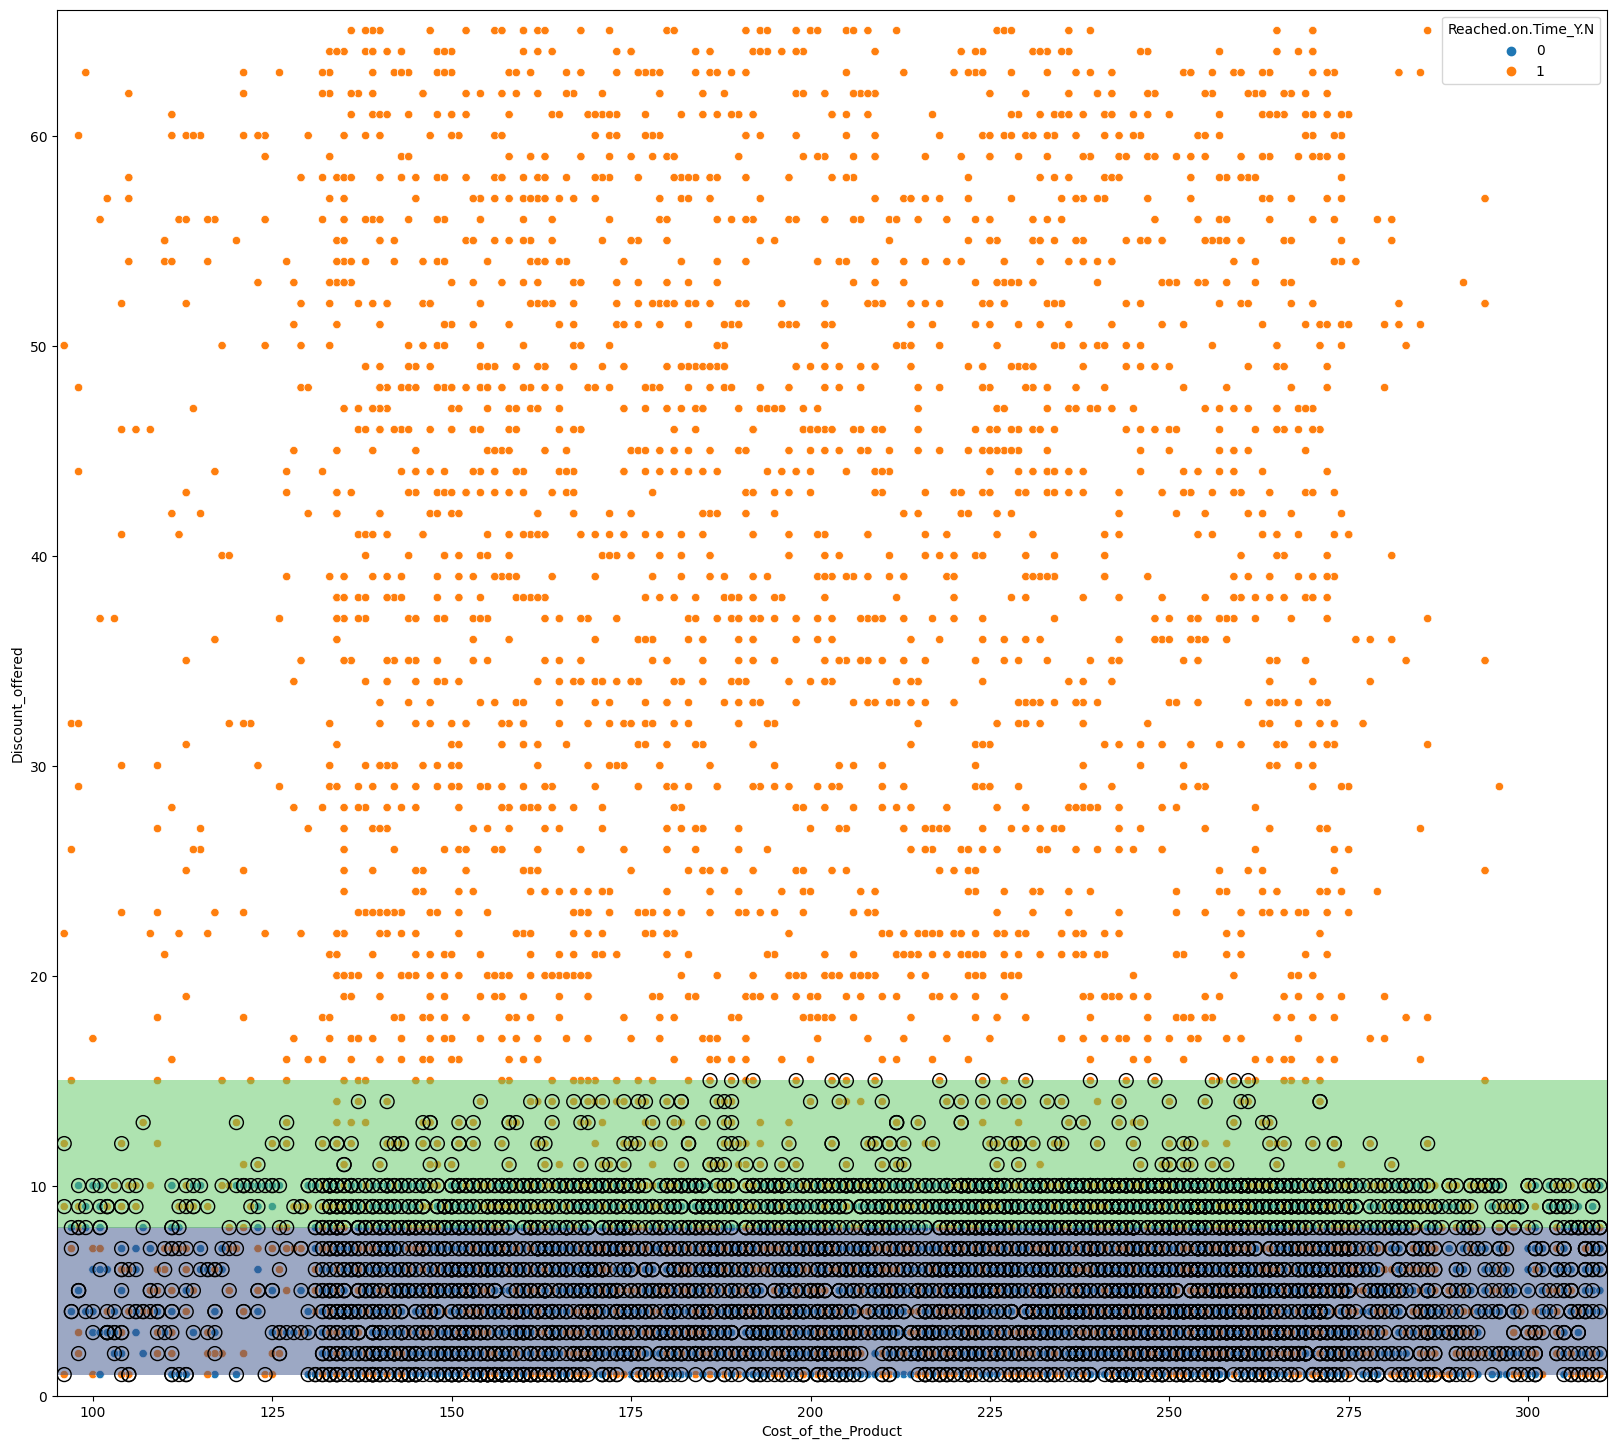

In [72]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(20, 18))
sns.scatterplot(x='Cost_of_the_Product', y='Discount_offered', hue='Reached.on.Time_Y.N', data=df)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm,
    X=X,
    plot_method="contourf",
    # colors="k", # untuk warna abu
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('Cost of the Product')
plt.ylabel('Discount offered')
plt.show()

c:\Users\Acer Gk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


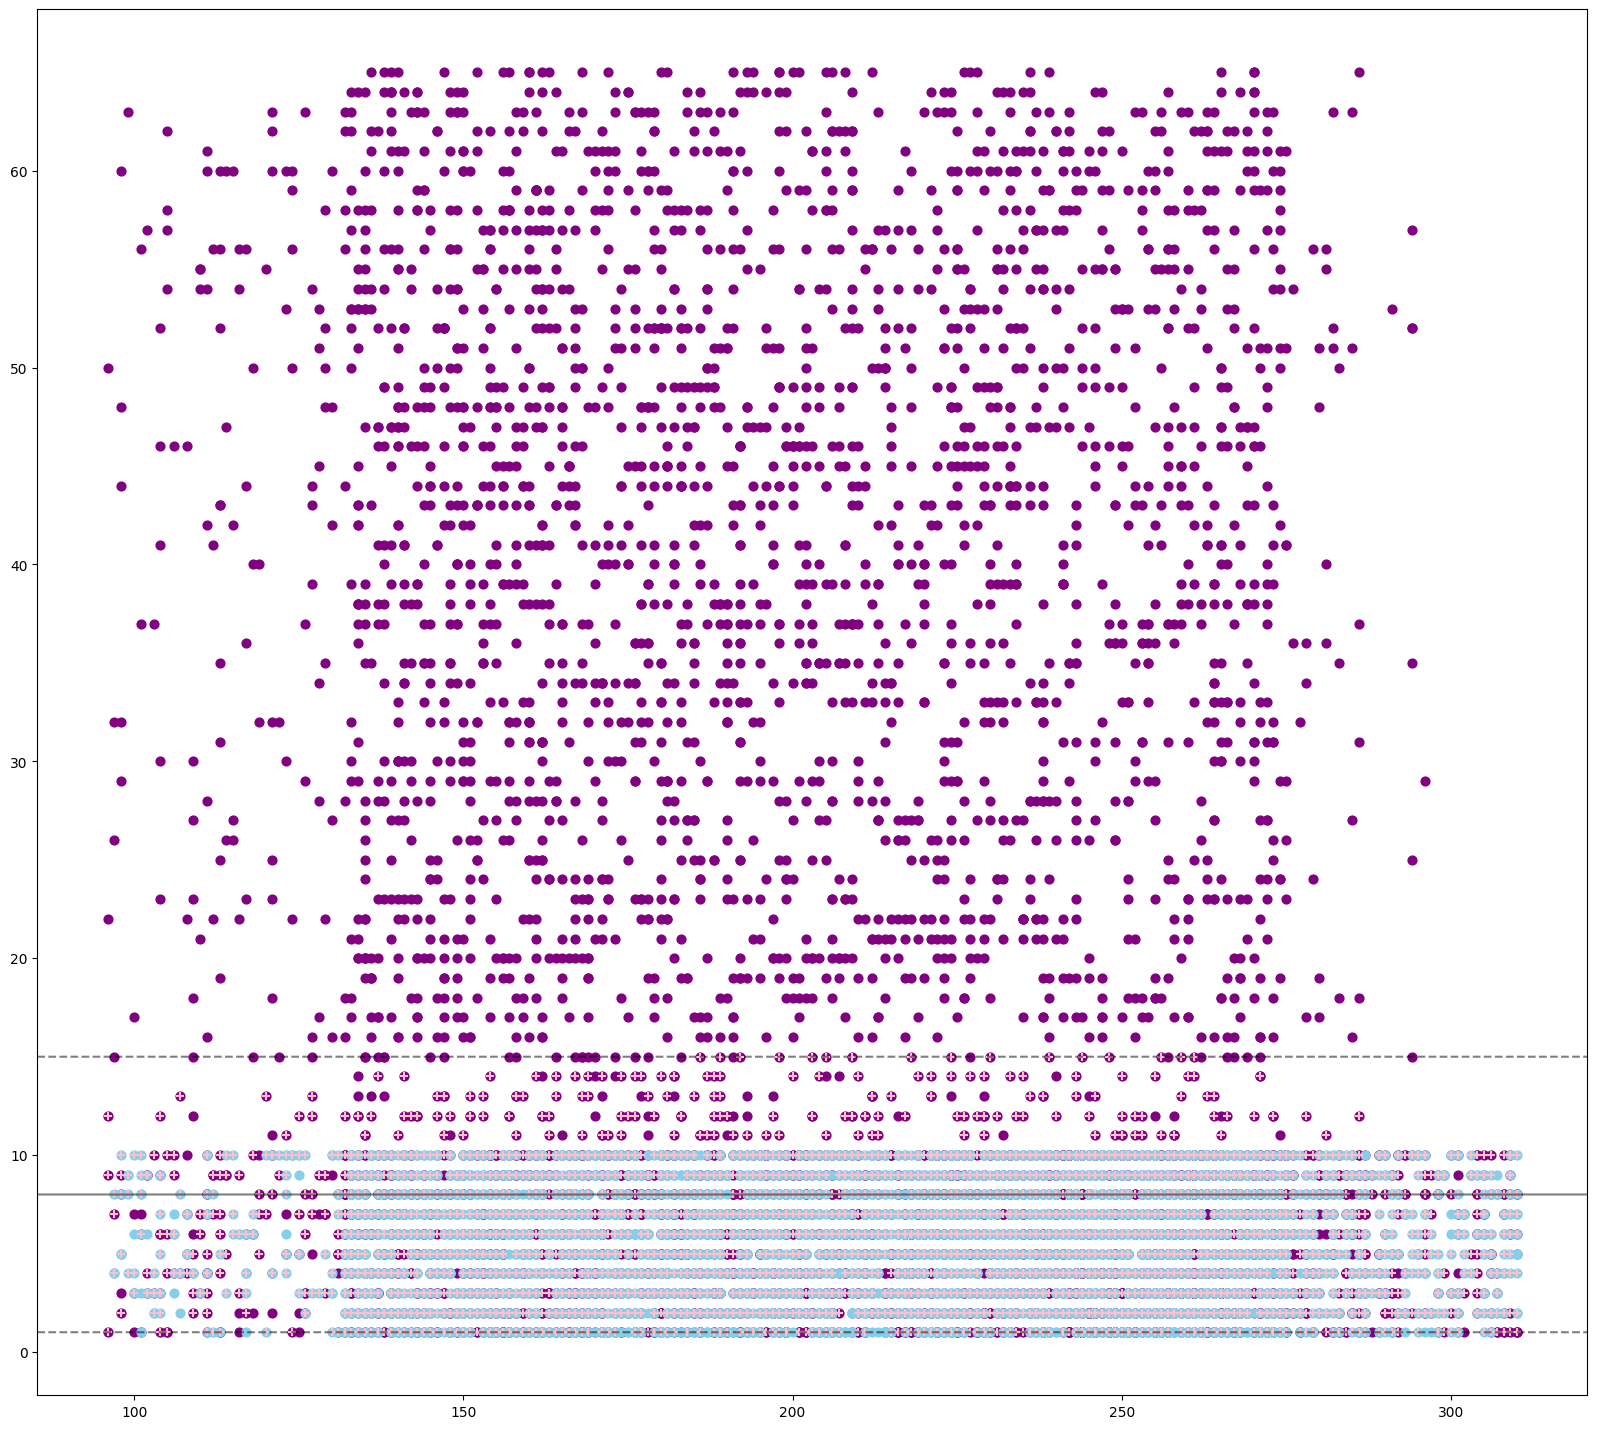

In [74]:
plt.figure(figsize = (20, 18))

# Plot data points dari onTime
plt.scatter(X[y == 'onTime'].iloc[:, 0], 
            X[y == 'onTime'].iloc[:, 1], 
            s = 40, c = 'purple', marker = 'o', label = 'onTime'
           )

# Plot data points dari Delay
plt.scatter(X[y == 'Delay'].iloc[:, 0], 
            X[y == 'Delay'].iloc[:, 1], 
            s = 40, c = 'skyblue', marker = 'o', label = 'Delay'
           )

# Plot data points dari Support Vector
plt.scatter(sv[:, 0], sv[:, 1], s=40, color='pink', marker='+', label='Support Vectors')

# Buat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Buat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x

# Buat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

## Unsupervised Learning

### B1. Mencari Nilai K

In [75]:
X = df[['Cost_of_the_Product', 'Discount_offered']] # Data frame (2D)
y = df['Reached.on.Time_Y.N']

TypeError: 'str' object is not callable

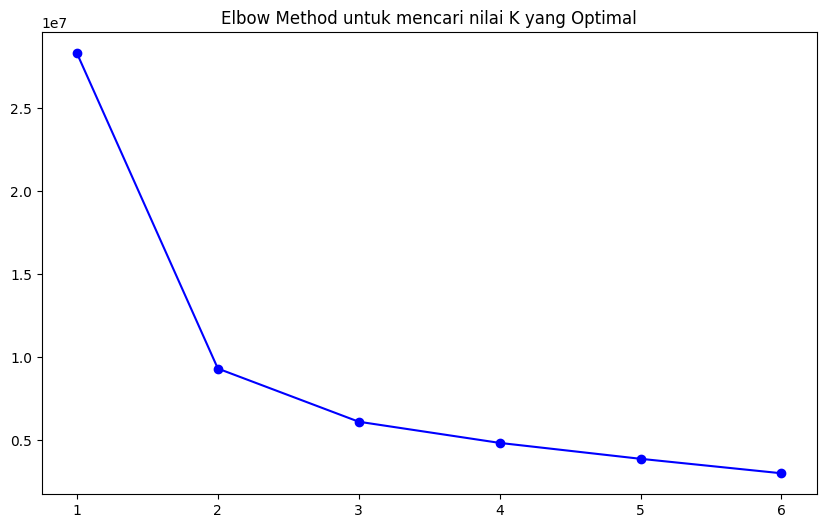

In [76]:
from sklearn.cluster import KMeans

wcss = [] # Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok

# Buat loop untuk melatih algoritma K-Means
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

# Buat grafik Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

##### Nilai K yang didapat adalah 2 karena pada dataset ini memiliki target hanya 0 dan 1.

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init = 'auto')

### Melatih model clustering

In [78]:
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto')

In [79]:
df['cluster'] = kmeans.labels_
centroid = kmeans.cluster_centers_

centroid

array([[248.89302721,  11.41445578],
       [165.74799766,  15.62316859]])

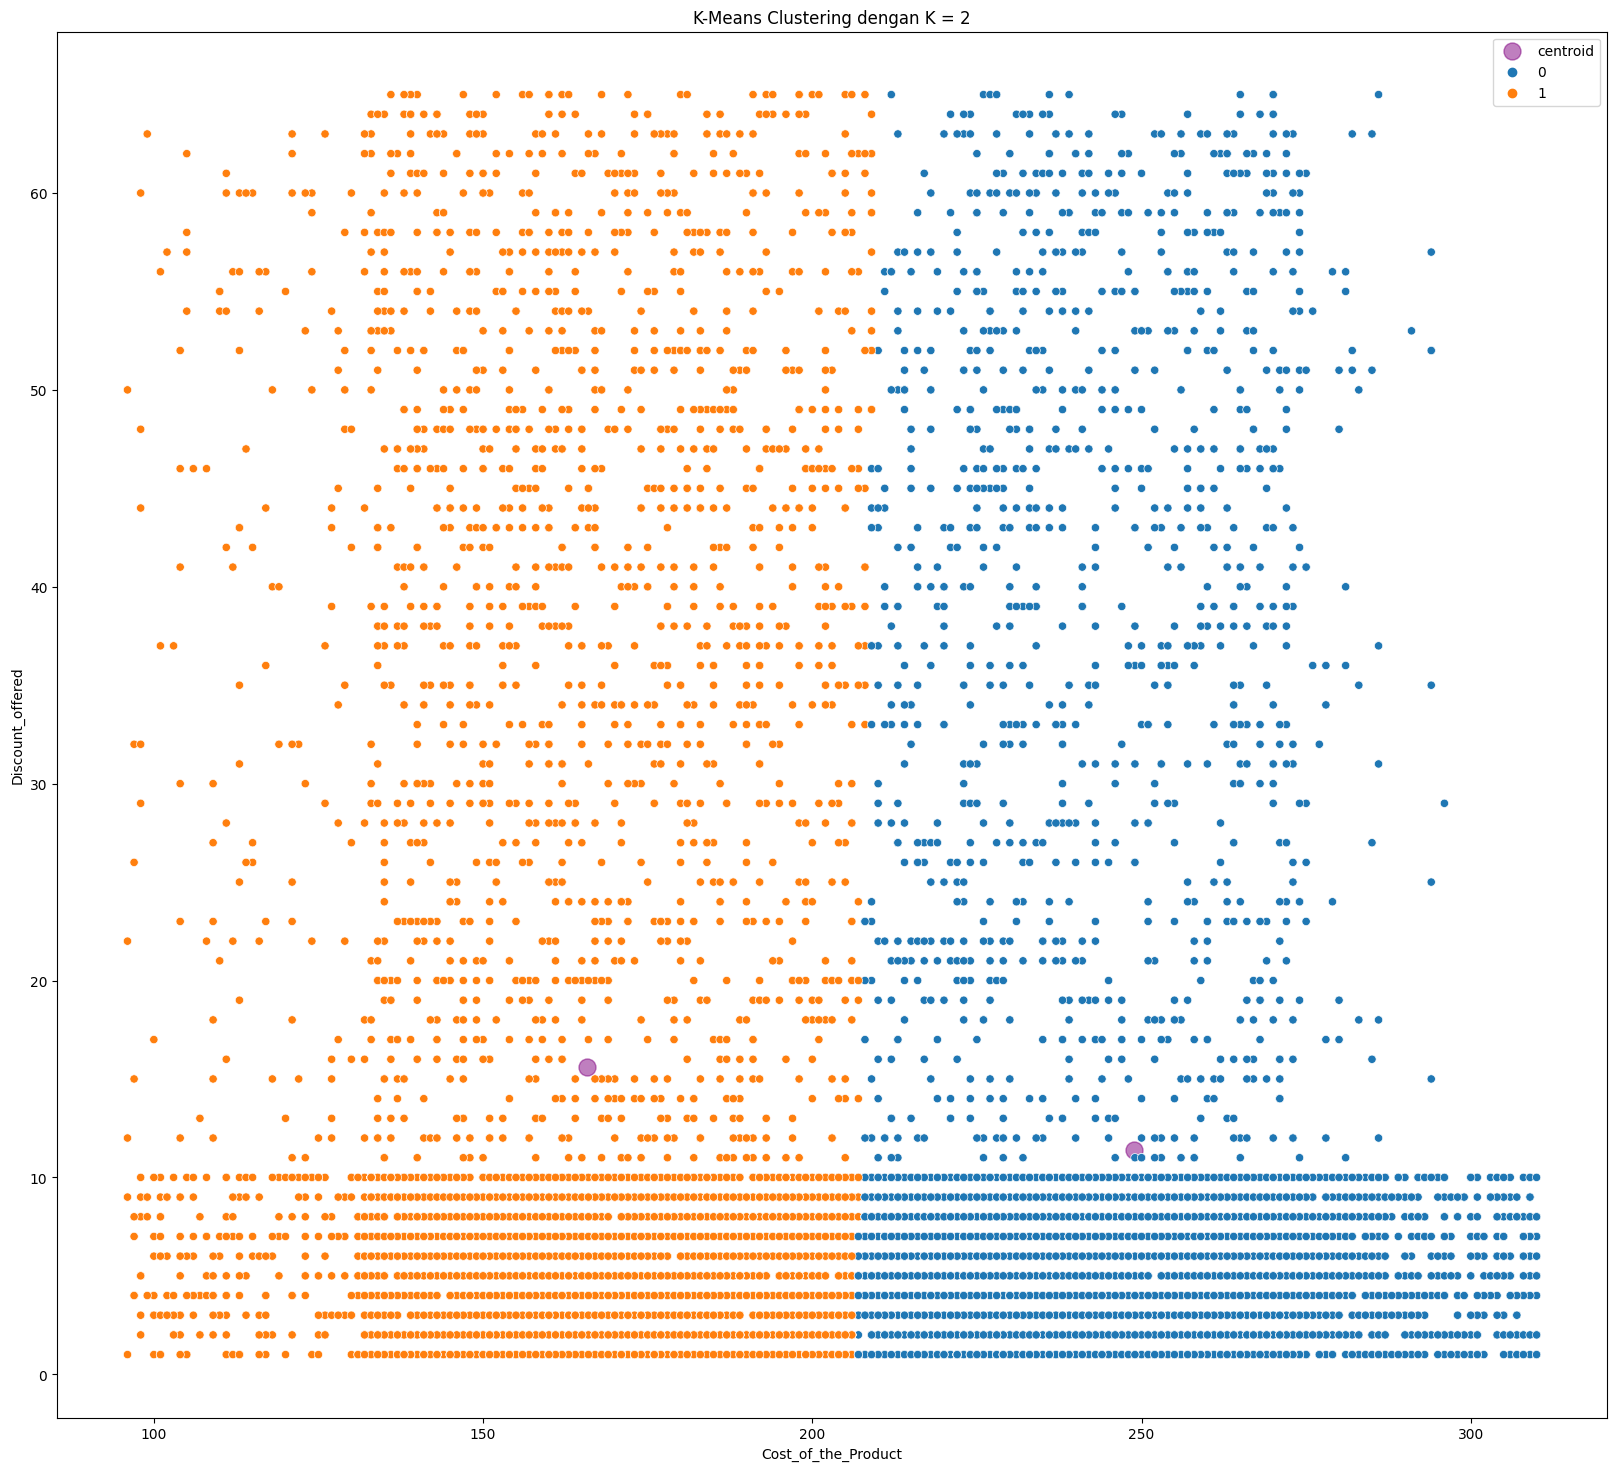

In [80]:
plt.figure(figsize = (20, 18 ))

# Data Points Pusat (Centroid)
plt.scatter(centroid[:, 0], centroid[:, 1], 
            alpha = 0.5, c = 'purple', s = 150, label = 'centroid')

# Data Points Hasil Prediksi Cluster
sns.scatterplot(data = df, x = 'Cost_of_the_Product', y = 'Discount_offered',
                hue = 'cluster')
plt.title("K-Means Clustering dengan K = 2")
plt.xlabel = ("Cost of the Product")
plt.ylabel = ("Discount offered")
plt.legend(loc = 'upper right')

plt.show()

### B2 Evaluasi Hasil Prediksi

#### - Tanpa Label Asli

In [81]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

ss_score = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {ss_score:.2f}")

db_index = davies_bouldin_score(X, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index:.2f}")

ch_index = calinski_harabasz_score(X, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.56
Davies-Bouldin Index: 0.61
Calinski-Harabasz Index: 22362.01


##### Nilai Silhouette Score dan Calinski-Harabasz Index yang tinggi menunjukkan bahwa cluster-cluster berada dalam kelompok yang baik dan terpisah satu sama lain, sementara nilai Davies-Bouldin Index yang rendah menunjukkan bahwa cluster-cluster berbeda dengan baik satu sama lain.

#### - Dengan Label Asli

In [82]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

cross_tab = pd.crosstab(df["cluster"], df["Reached.on.Time_Y.N"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

ari = adjusted_rand_score(df["Reached.on.Time_Y.N"], kmeans.labels_)
print(f"Adjusted Rand Index (ARI)           : {ari:.2f}")

true_labels_num = df["Reached.on.Time_Y.N"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, kmeans.labels_)
print(f"Normalized Mutual Information (NMI) : {nmi:.2f}")

homogeneity = homogeneity_score(df["Reached.on.Time_Y.N"], kmeans.labels_)
completeness = completeness_score(df["Reached.on.Time_Y.N"], kmeans.labels_)
v_measure = v_measure_score(df["Reached.on.Time_Y.N"], kmeans.labels_)
print(f"Homogeneity Score                   : {homogeneity:.2f}")
print(f"Completeness Score                  : {completeness:.2f}")
print(f"V-Measure Score                     : {v_measure:.2f}")

Cross-Tabulation:
Reached.on.Time_Y.N     0     1
cluster                        
0                    2564  3331
1                    1872  3232 

Adjusted Rand Index (ARI)           : 0.00
Normalized Mutual Information (NMI) : 0.00
Homogeneity Score                   : 0.00
Completeness Score                  : 0.00
V-Measure Score                     : 0.00


### - Cross-Tabulation : 
##### - Cluster (0) Baris Pertama: Terdapat 2572 data point yang termasuk dalam cluster 0 dan memiliki nilai 0. Artinya mengindikasikan ketidak-tercapainya waktu pengiriman.
##### - Cluster (0) Baris Kedua : Terdapat 3336 data point yang termasuk dalam cluster 0 dan memiliki nilai 1. Artinya mengindikasikan pencapaian waktu pengiriman.
##### - Cluster (1) Baris Ketiga : Terdapat 1864 data point yang termasuk dalam cluster 1 dan memiliki nilai 0. Artinya ketidak-tercapainya waktu pengiriman.
##### - Cluster (1) Baris Keempat : Terdapat 3227 data point yang termasuk dalam cluster 1 dan memiliki nilai 1. Artinya pencapaian waktu pengiriman.

##### - Adjusted Rand Index : Nilai ARI sebesar 0.00 menunjukkan bahwa kesesuaian antara pengelompokkan dan label asli hanya sedikit lebih baik daripada pengelompokkan acak. Nilai ARI mendekati 0 menunjukkan bahwa tidak ada kesesuaian yang baik antara pengelompokan dan label asli.

##### - NMI : Nilai NMI sebesar 0.00 menunjukkan bahwa ada sedikit kesesuaian informasi antara pengelompokkan dan label asli.

##### - Homogeneity Score : Nilainya sebesar 0.00 menunjukkan bahwa clustering memiliki sedikit homogenitas dalam setiap cluster.

##### - Completeness Score : Nilainya sebesar 0.00 menunjukkan bahwa sebagian besar anggota dengan label yang sama termasuk dalam satu cluster.

##### - V-Measure Score : Nilainya sebesar 0.00 menunjukkan bahwa pengelompokkan memiliki sejumlah kecil konsistensi dengan label asli.

##### Secara keseluruhan, hasil ini menunjukkan bahwa clustering yang dilakukan dengan K-Means tidak sesuai dengan label asli dan memiliki kualitas yang sangat rendah.

### B3

C:\Users\Acer Gk\AppData\Local\Temp\ipykernel_14632\3088867825.py:12: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(df, x="Cost_of_the_Product", y="Discount_offered", palette=warna,
C:\Users\Acer Gk\AppData\Local\Temp\ipykernel_14632\3088867825.py:16: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(df, x="Cost_of_the_Product", y="Discount_offered", palette=warna,


TypeError: 'str' object is not callable

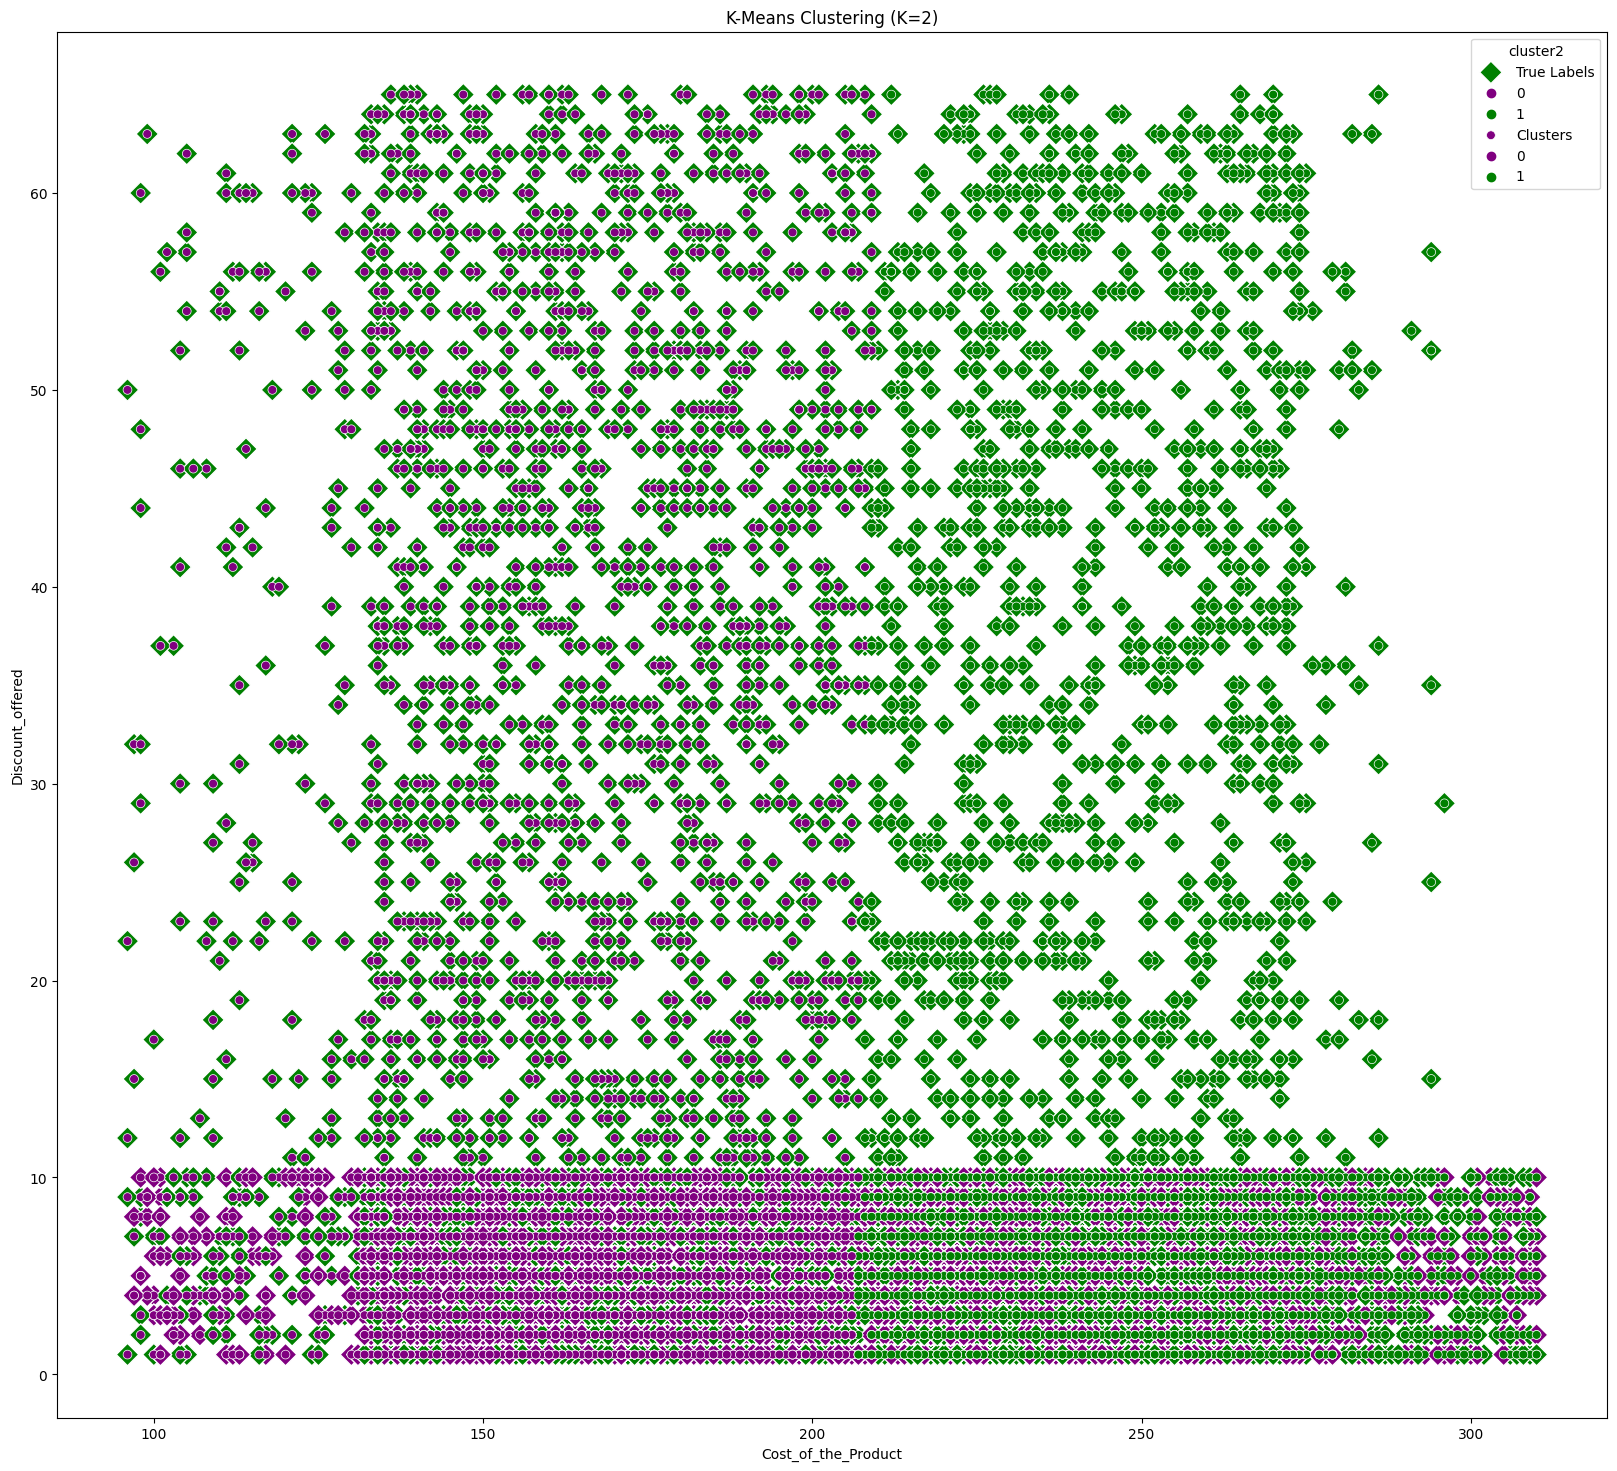

In [83]:
# Karena hasil prediksi memiliki urutan berbeda dengan label aslinya
# Maka harus dilakukan mapping seperti berikut

cluster_mapping = {0: 1, 1: 0, 2: 2} # 0 jadi 1; 1 jadi 0; 2 tetap 2

# Buat kolom baru agar tidak mengganggu kolom hasil prediksi
df["cluster2"] = df["cluster"].map(cluster_mapping)

# Buat sebuah scatter plot untuk data-points label aslinya
plt.figure(figsize=(20,18))
warna = ["purple", "green", "black"]
sns.scatterplot(df, x="Cost_of_the_Product", y="Discount_offered", palette=warna,
hue="Reached.on.Time_Y.N", marker="D", s=130, label="True Labels")

# Tindih data-points tersebut dengan hasil prediksinya
sns.scatterplot(df, x="Cost_of_the_Product", y="Discount_offered", palette=warna,
hue="cluster2", marker="o", s=40, label="Clusters")

plt.title("K-Means Clustering (K=2)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Legend", loc="upper right")
plt.show()